# A larger example (Medical Cost Personal Datasets)
[Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance) from Kaggle.

In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Let's try one-hot encoding our DataFrame so it's all numerical
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [4]:
# Create X & y values (features and labels)

X = insurance_one_hot.drop("charges", axis=1)
y = insurance["charges"]

In [5]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [6]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [7]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [8]:
# Build a neural network model to predict insurance costs
tf.random.set_seed(42)
# 1. Create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8577.1143 - mae: 8577.1143
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7865.2607 - mae: 7865.2607
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7611.8784 - mae: 7611.8784
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7692.8237 - mae: 7692.8237
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7674.9971 - mae: 7674.9971
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7640.2832 - mae: 7640.2832
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7546.8828 - mae: 7546.8828
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7717.6543 - mae: 7717.6543
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7551.4629 - mae: 7551.4629
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7728.7842 - mae: 7728.7842

In [9]:
# Check out insurance_model summary
insurance_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Check the results of the insurance model on the test data
loss_1, mae_1 = insurance_model.evaluate(X_test, y_test)
loss_1, mae_1

9/9 [==============================] - 0s 2ms/step - loss: 8295.1016 - mae: 8295.1016


(8295.1015625, 8295.1015625)

In [11]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now, it looks like our model isn't performing very well. Let's try and improve it.

To (try) to improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer.
2. Same as above but, Train for longer.

In [12]:
len(X_train), len(y_train)

(1070, 1070)

In [13]:
# Let's rebuild our model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=[len(X_train.keys())]),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(), # if SGD doesn't work, try Adam
                        metrics=["mae"])

insurance_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               1200      
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 13294.9795 - mae: 13294.9795
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13086.9639 - mae: 13086.9639
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12683.8359 - mae: 12683.8359
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 11921.3721 - mae: 11921.3721
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10694.1533 - mae: 10694.1533
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9208.6172 - mae: 9208.6172
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7957.8784 - mae: 7957.8784
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7478.9819 - mae: 7478.9819
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7415.6797 - mae: 7415.6797
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7395.5664 - mae:

In [15]:
# Check the results of insurance_model_2 on the test data
loss_2, mae_2 = insurance_model_2.evaluate(X_test, y_test)
loss_2, mae_2

9/9 [==============================] - 0s 2ms/step - loss: 4512.4219 - mae: 4512.4219


(4512.421875, 4512.421875)

Experiment 2: Same as above but, train for longer.

In [16]:
#Set random seed
tf.random.set_seed(42)
# Create the model
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit the model
history_3 = insurance_model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 0s 2ms/step - loss: 13289.8252 - mae: 13289.8252
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 13114.3252 - mae: 13114.3252
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 12749.7725 - mae: 12749.7725
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 12041.2500 - mae: 12041.2500
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 10876.3105 - mae: 10876.3105
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 9425.2363 - mae: 9425.2363
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 8135.6450 - mae: 8135.6450
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 7547.2163 - mae: 7547.2163
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 7452.9614 - mae: 7452.9614
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 7433.1973 - mae:

In [17]:
# Check the results of insurance_model_3 on the test data
loss_3, mae_3 = insurance_model_3.evaluate(X_test, y_test)
loss_3, mae_3

9/9 [==============================] - 0s 2ms/step - loss: 3170.3430 - mae: 3170.3430


(3170.343017578125, 3170.343017578125)

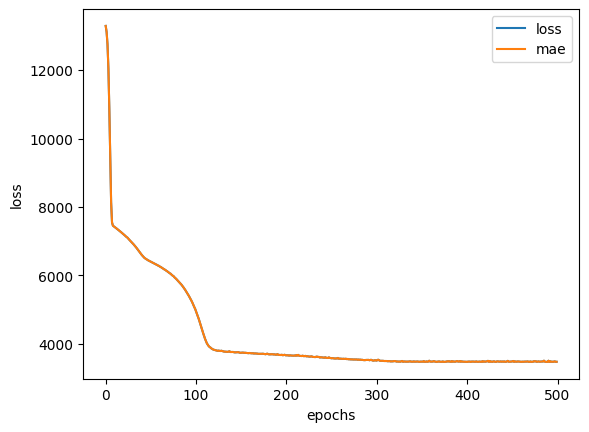

In [18]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

🤔**Question:** How long should you train for?
It's depends. Really... it depends on the problem you're working on. However, if you have a problem where you can measure the performance of a model (such as this one), you can use a technique called **early stopping** callback.

### Experiment 3: Same as above but, add an early stopping callback to our model
To prevent over-fitting, we could stop training our model once it stops improving on a particular metric. We can do this using the EarlyStopping callback.


In [19]:
from tensorflow.keras.callbacks import EarlyStopping
# Set random seed
tf.random.set_seed(42)

# Create the model

insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Define the callback
early_stopping = EarlyStopping(
    monitor='loss',  # Monitor the validation loss
    patience=3,          # Stop training after 3 epochs with no improvement
    mode='min'           # Minimize the monitored quantity
)

# Compile the model with the callback
insurance_model_4.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.mae, metrics=['mae'])

# Train the model
history_4 = insurance_model_4.fit(X_train, y_train, epochs=500, callbacks=[early_stopping])


Epoch 1/500
34/34 [==============================] - 1s 3ms/step - loss: 13316.2041 - mae: 13316.2041
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 13175.8184 - mae: 13175.8184
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 12872.9287 - mae: 12872.9287
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 12254.9736 - mae: 12254.9736
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 11177.6680 - mae: 11177.6680
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 9718.5430 - mae: 9718.5430
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 8309.1533 - mae: 8309.1533
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 7562.2529 - mae: 7562.2529
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 7421.3804 - mae: 7421.3804
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 7399.6670 - mae:

In [20]:
# Check the results of insurance_model_4 on the test data
loss_4, mae_4 = insurance_model_4.evaluate(X_test, y_test)
loss_4, mae_4

9/9 [==============================] - 0s 2ms/step - loss: 3629.5693 - mae: 3629.5693


(3629.5693359375, 3629.5693359375)

### Plot history (also known as a loss curve or a training curve)

Text(0.5, 0, 'epochs')

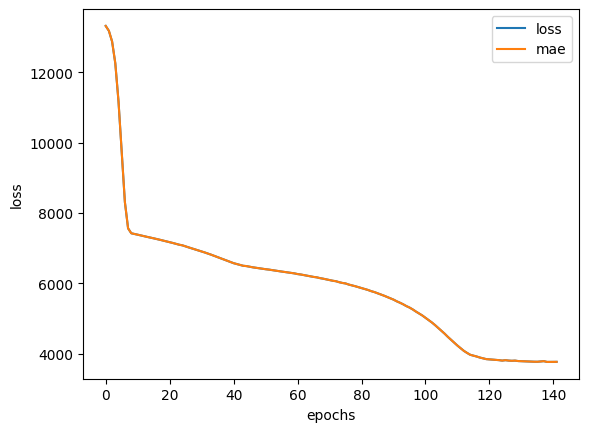

In [21]:
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Preprocessing data (normalization and standardization)
In terms of scaling values, neural networks tend to prefer normalization.
If you're not sure on which to use, you could try both and see which performs better.

> Many Machine Learning algorithms perform better or converge faster when features are on a similar scale and/or close to normally distributed.
[Scale, Standardize or Normalize with Scikit-Learn](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot: ylabel='Frequency'>

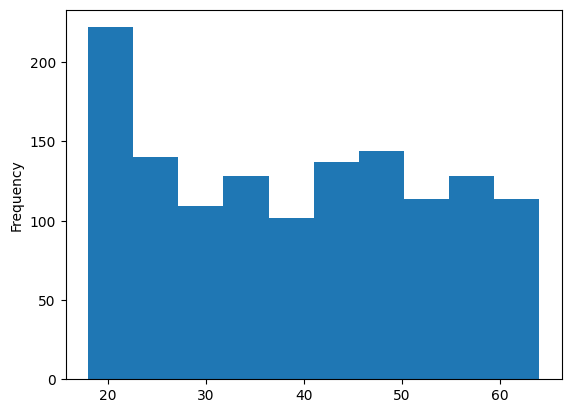

In [23]:
X["age"].plot(kind="hist")

<AxesSubplot: ylabel='Frequency'>

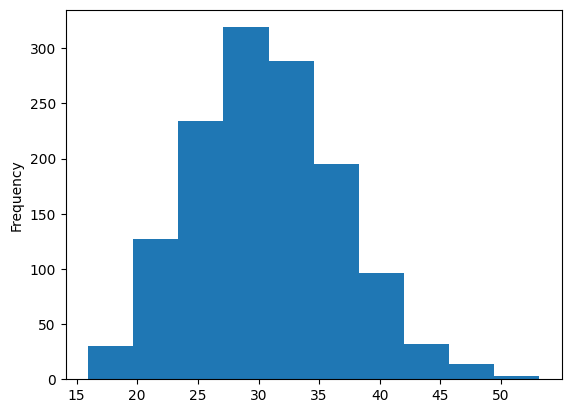

In [24]:
X["bmi"].plot(kind="hist")

<AxesSubplot: ylabel='Frequency'>

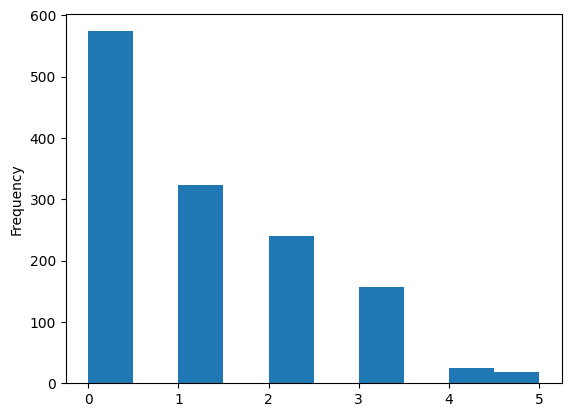

In [25]:
X["children"].plot(kind="hist")

To prepare our data, we can borrow few classes from Scikit-Learn.

In [26]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # Turn all values between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region']) # Turn categories into numbers
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [27]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [28]:
X_train.shape, X_train_normal.shape # Before and after transformation. One-hot encoding creates 5 new columns(2 for sex, 2 for region and 1 smoke).

((1070, 6), (1070, 11))

In [29]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

Beautiful! Our data has been transformed and normalized. Now it's ready to be modeled.

In [30]:
# Set random seed
tf.random.set_seed(42)
# Creat the model
insurance_model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_5.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])


# Fit the model
history_5 = insurance_model_5.fit(X_train_normal, y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 0s 3ms/step - loss: 13344.0977 - mae: 13344.0977
Epoch 2/300
34/34 [==============================] - 0s 3ms/step - loss: 13337.1055 - mae: 13337.1055
Epoch 3/300
34/34 [==============================] - 0s 3ms/step - loss: 13319.2354 - mae: 13319.2354
Epoch 4/300
34/34 [==============================] - 0s 3ms/step - loss: 13280.5312 - mae: 13280.5312
Epoch 5/300
34/34 [==============================] - 0s 3ms/step - loss: 13210.1348 - mae: 13210.1348
Epoch 6/300
34/34 [==============================] - 0s 3ms/step - loss: 13096.7871 - mae: 13096.7871
Epoch 7/300
34/34 [==============================] - 0s 3ms/step - loss: 12929.8262 - mae: 12929.8262
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 12698.9395 - mae: 12698.9395
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 12393.7412 - mae: 12393.7412
Epoch 10/300
34/34 [==============================] - 0s 3ms/step - loss: 12007.89

In [31]:
# Check the results of insurance_model_5 on the test data
loss_5, mae_5 = insurance_model_5.evaluate(X_test_normal, y_test)
loss_5, mae_5

9/9 [==============================] - 0s 2ms/step - loss: 3160.6128 - mae: 3160.6128


(3160.61279296875, 3160.61279296875)

In [32]:
# Compare the model's results with the previous model

model_results = [['insurance_model', loss_1, mae_1],
                 ['insurance_model_2', loss_2, mae_2],
                 ['insurance_model_3', loss_3, mae_3],
                 ['insurance_model_4', loss_4, mae_4],
                 ['insurance_model_5', loss_5, mae_5]]

all_results = pd.DataFrame(model_results, columns=['model', 'loss', 'mae'])
all_results

,model,loss,mae
0,insurance_model,8295.101562,8295.101562
1,insurance_model_2,4512.421875,4512.421875
2,insurance_model_3,3170.343018,3170.343018
3,insurance_model_4,3629.569336,3629.569336
4,insurance_model_5,3160.612793,3160.612793


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


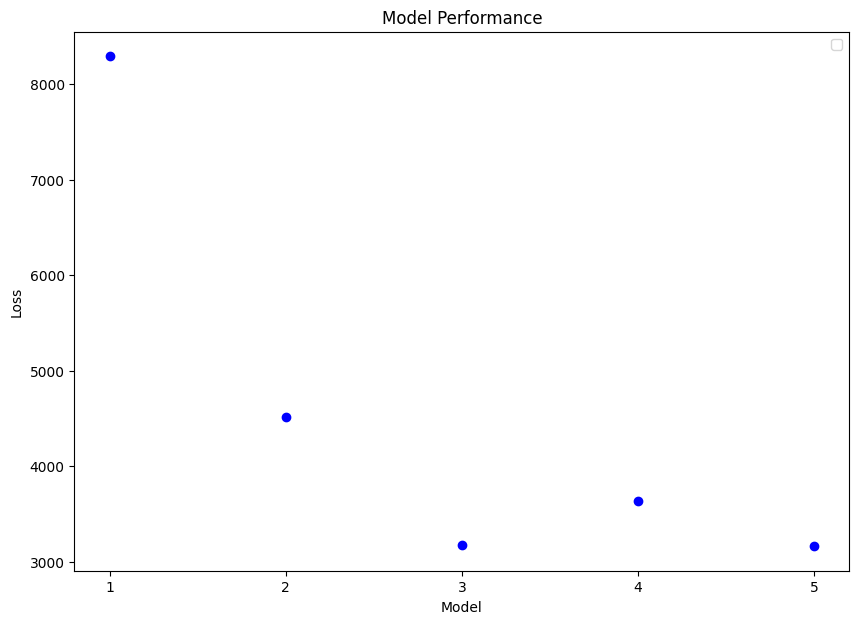

In [36]:
import numpy as np
plt.figure(figsize=(10, 7))
# Plot losses
plt.scatter(range(1, len(model_results) + 1), all_results['loss'], c="b")
plt.title("Model Performance")
plt.xticks(np.arange(1, len(model_results) + 1, 1.0)) # Change x-axis ticks to be 1, 2, 3, 4, 5
plt.xlabel("Model")
plt.ylabel("Loss")
# Show the legend
plt.legend()

<AxesSubplot: >

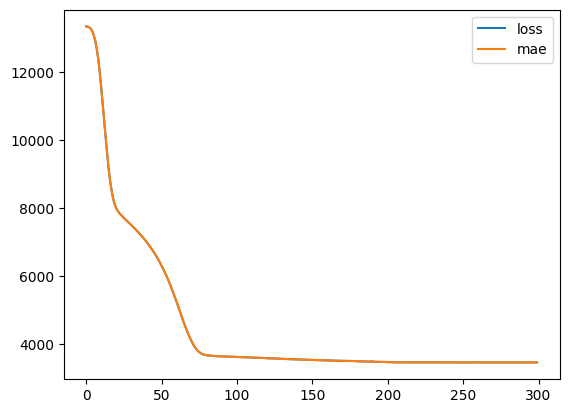

In [34]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history_5.history).plot()